In [1]:
import pandas as pd
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

folder_path = '../assets/Assignment_Data_2023-2024/Assignment_Data_2023-2024/'

club_games_df = pd.read_csv(folder_path+'club_games.csv')
clubs_df = pd.read_csv(folder_path+'clubs.csv')
competition_df = pd.read_csv(folder_path+'competitions.csv')

<Figure size 1500x800 with 0 Axes>

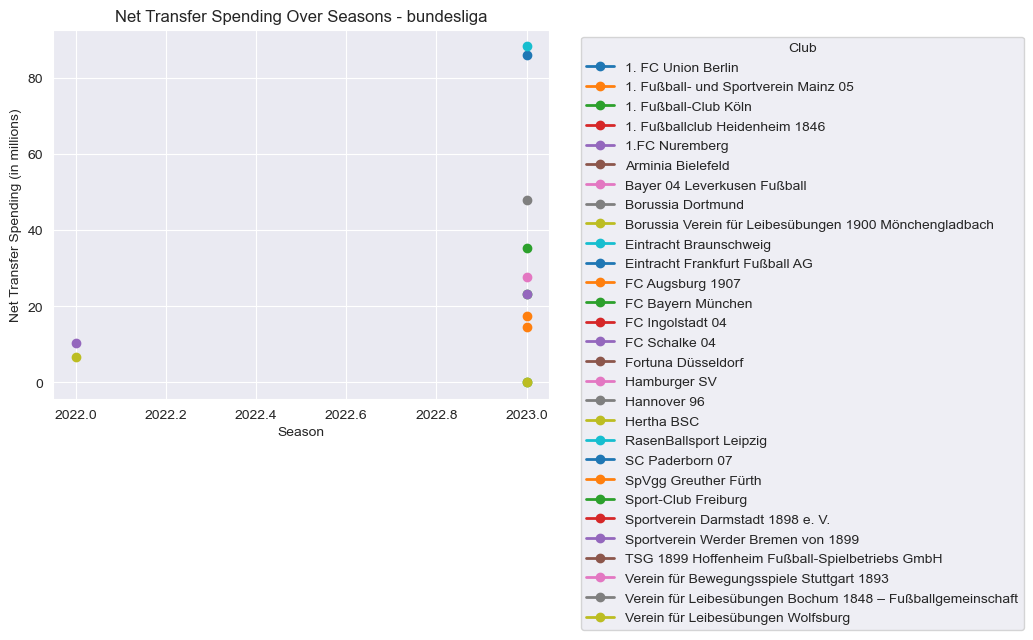

<Figure size 1500x800 with 0 Axes>

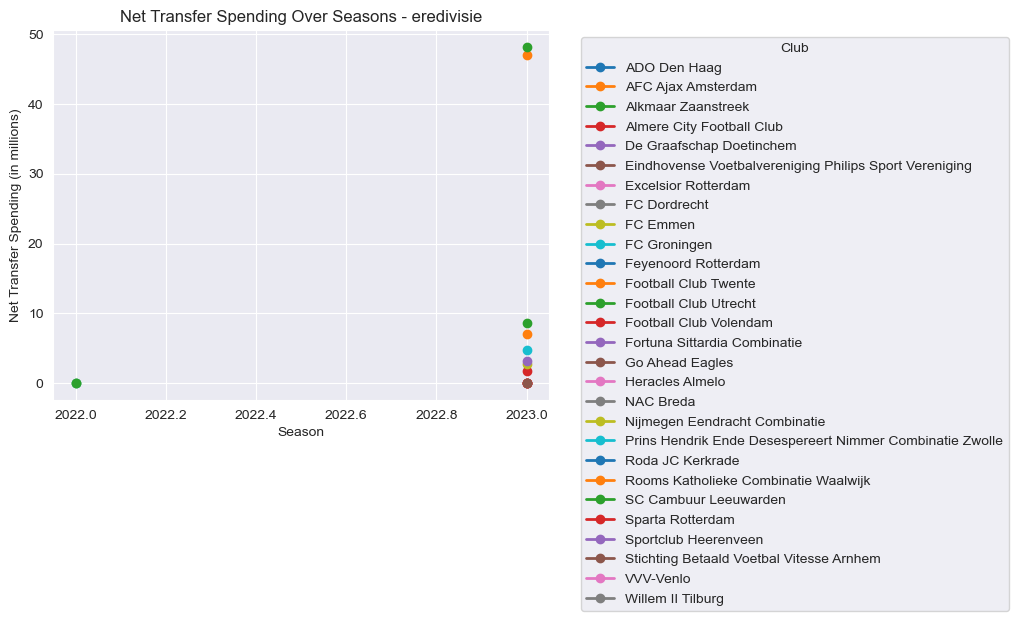

<Figure size 1500x800 with 0 Axes>

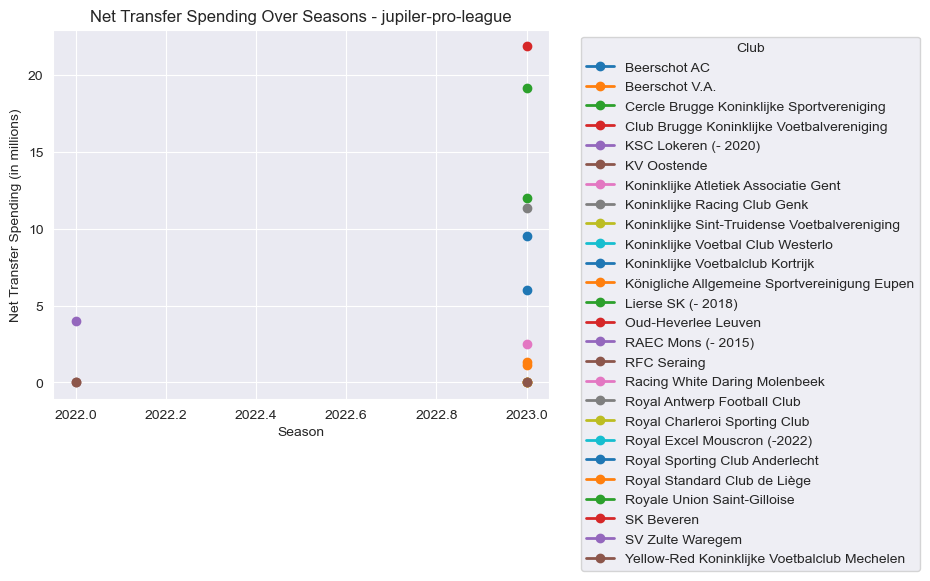

<Figure size 1500x800 with 0 Axes>

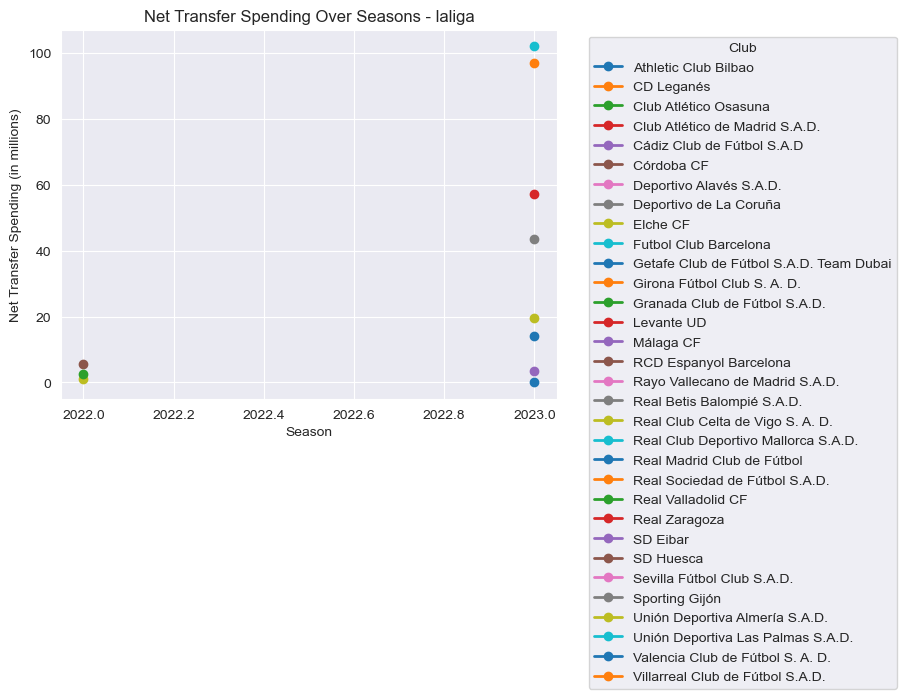

<Figure size 1500x800 with 0 Axes>

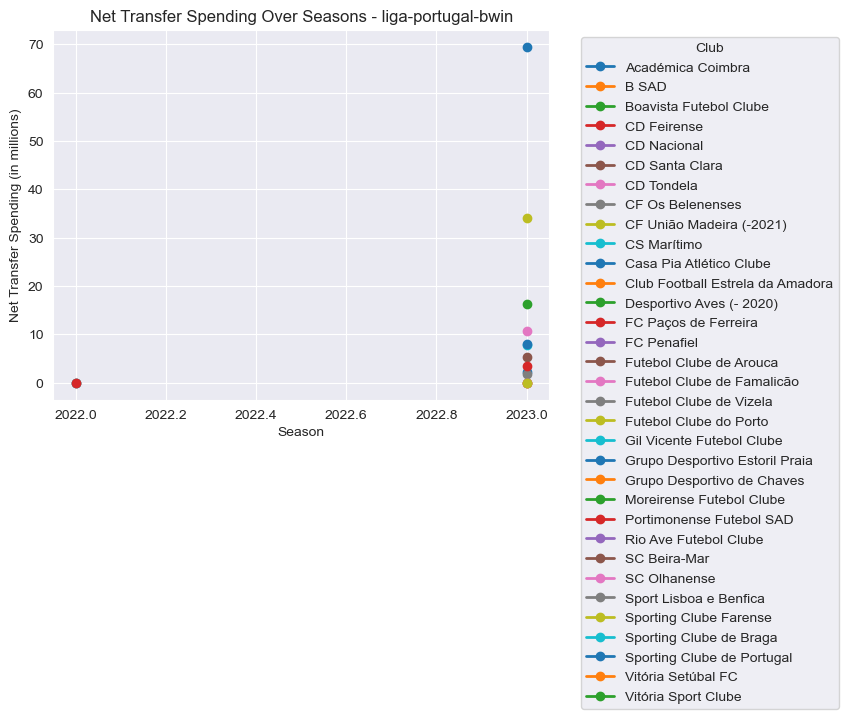

<Figure size 1500x800 with 0 Axes>

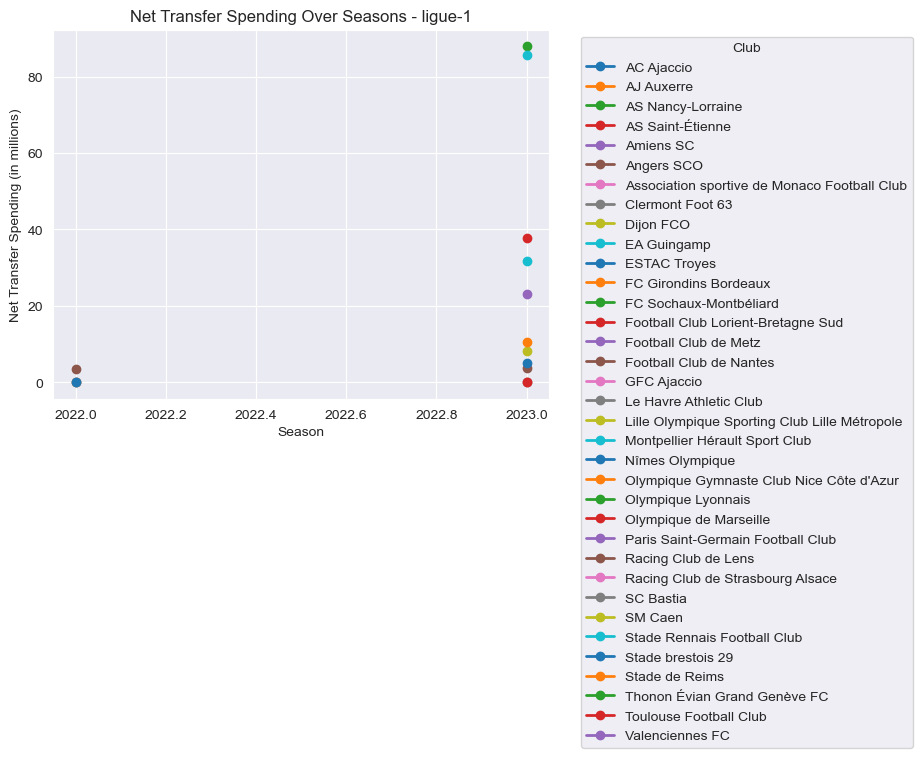

<Figure size 1500x800 with 0 Axes>

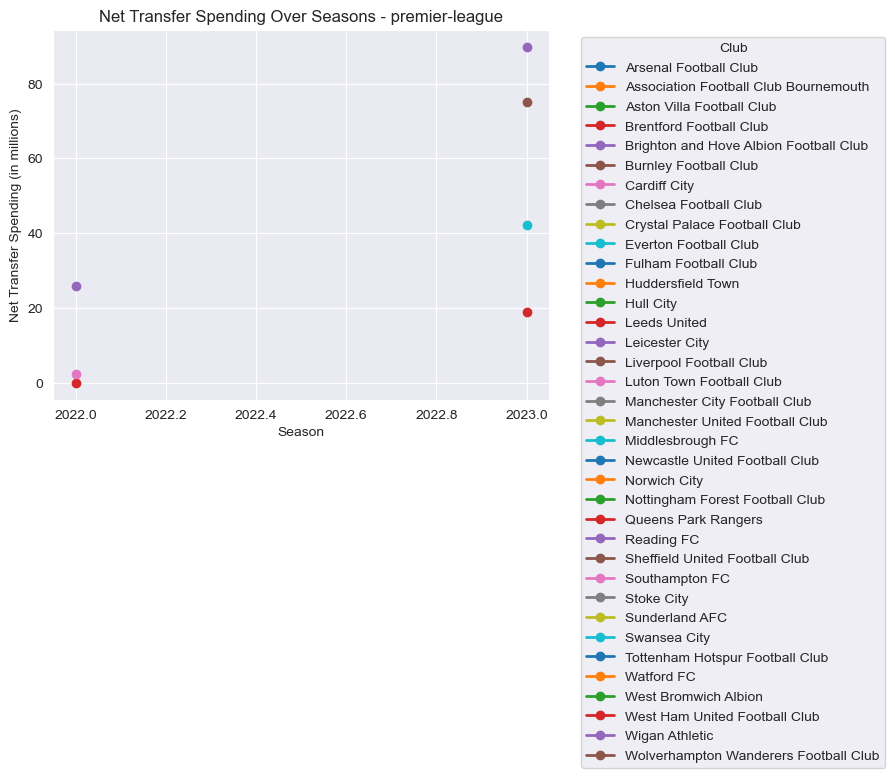

<Figure size 1500x800 with 0 Axes>

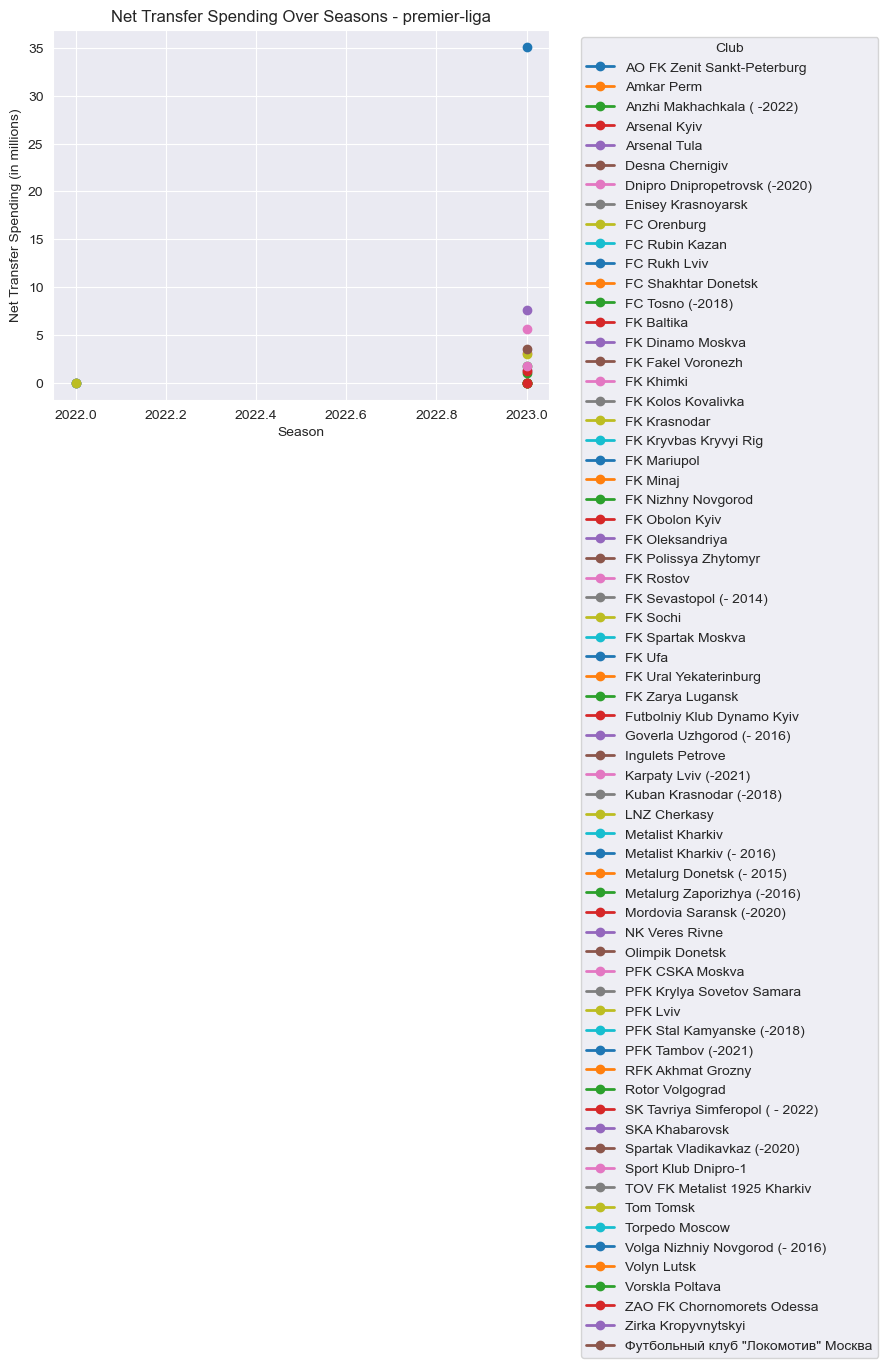

<Figure size 1500x800 with 0 Axes>

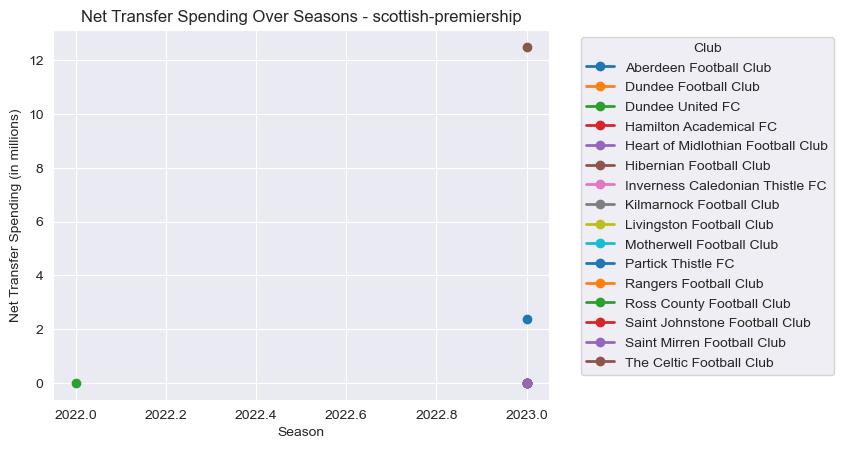

<Figure size 1500x800 with 0 Axes>

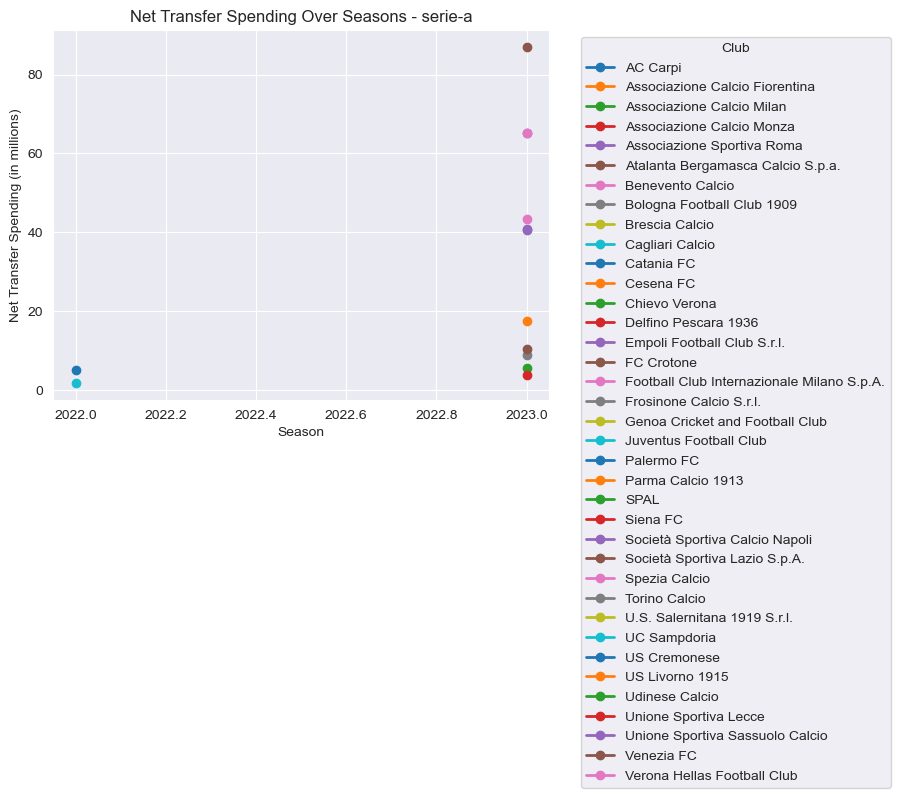

<Figure size 1500x800 with 0 Axes>

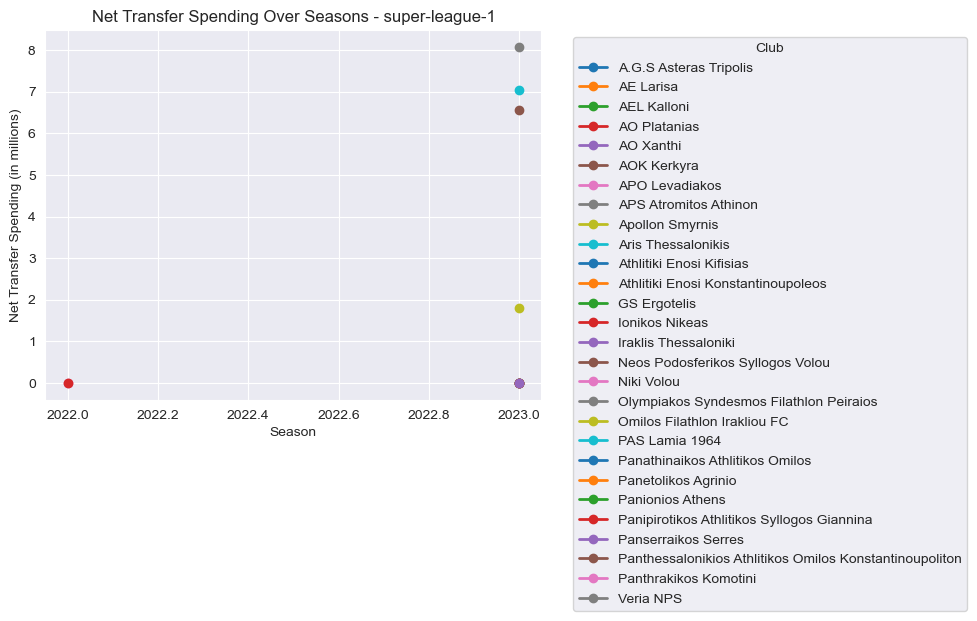

<Figure size 1500x800 with 0 Axes>

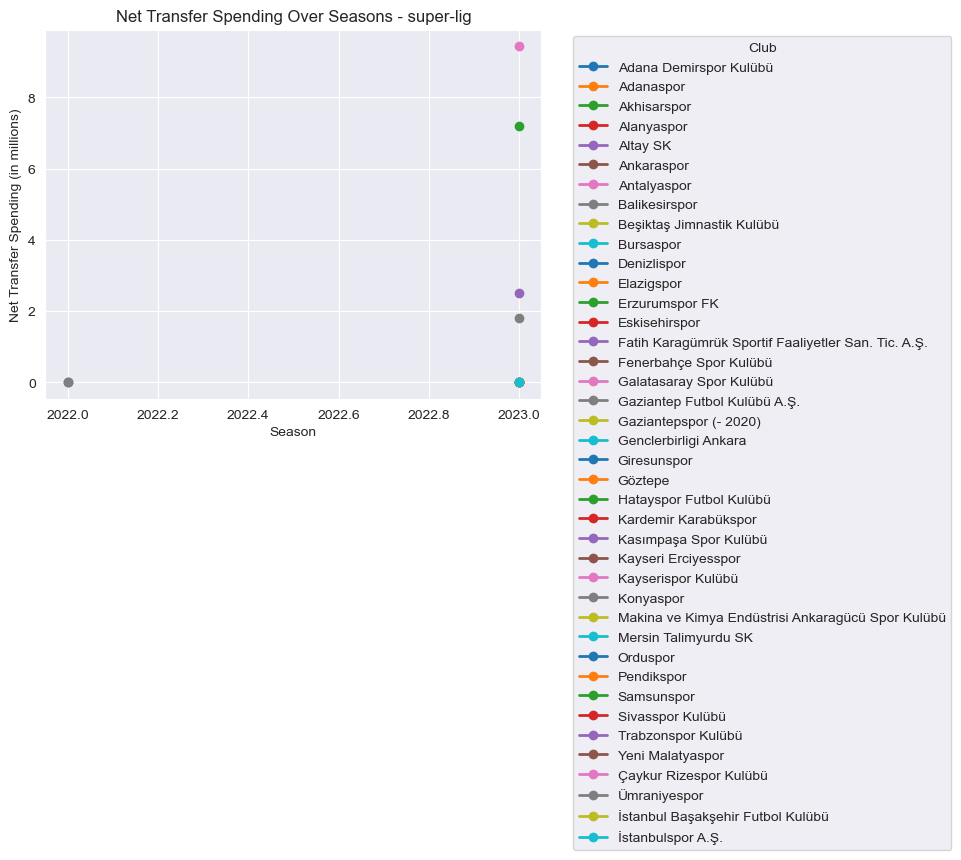

<Figure size 1500x800 with 0 Axes>

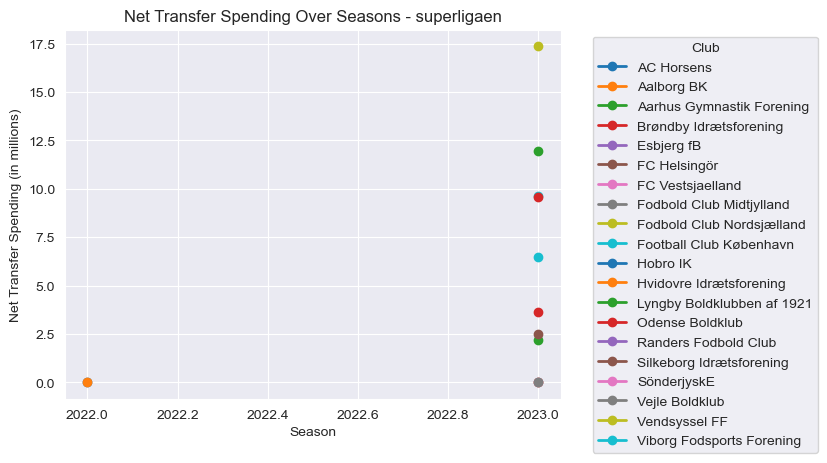

In [2]:
'''
in dataset to abbreviate millions there is m near the number, we have to clean that in order to make the conversion
to a number 
also excluding negative values 
'''
clubs_df['net_transfer_record'] = clubs_df['net_transfer_record'].replace('[\$,€m]', '', regex=True)

clubs_df['net_transfer_record'] = pd.to_numeric(clubs_df['net_transfer_record'], errors='coerce')

merged_df = pd.merge(clubs_df, competition_df[['competition_id', 'competition_code']], left_on='domestic_competition_id', right_on='competition_id')

club_transfer_analysis = merged_df.groupby(['competition_code', 'name', 'last_season'])['net_transfer_record'].sum().reset_index()

competition_codes = club_transfer_analysis['competition_code'].unique()


for code in competition_codes:
    code_data = club_transfer_analysis[club_transfer_analysis['competition_code'] == code]
    pivot_table = code_data.pivot(index='last_season', columns='name', values='net_transfer_record')
 
    last_3_years = pivot_table.index[-2:]
    pivot_table = pivot_table.loc[last_3_years]
    
    pivot_table = pivot_table.map(lambda  x: x if x>= 0 else np.nan )
    
    plt.figure(figsize=(15, 8))
    pivot_table.plot(kind='line', marker='o', linewidth=2)
    plt.title(f'Net Transfer Spending Over Seasons - {code}')
    plt.xlabel('Season')
    plt.ylabel('Net Transfer Spending (in millions)')
    plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

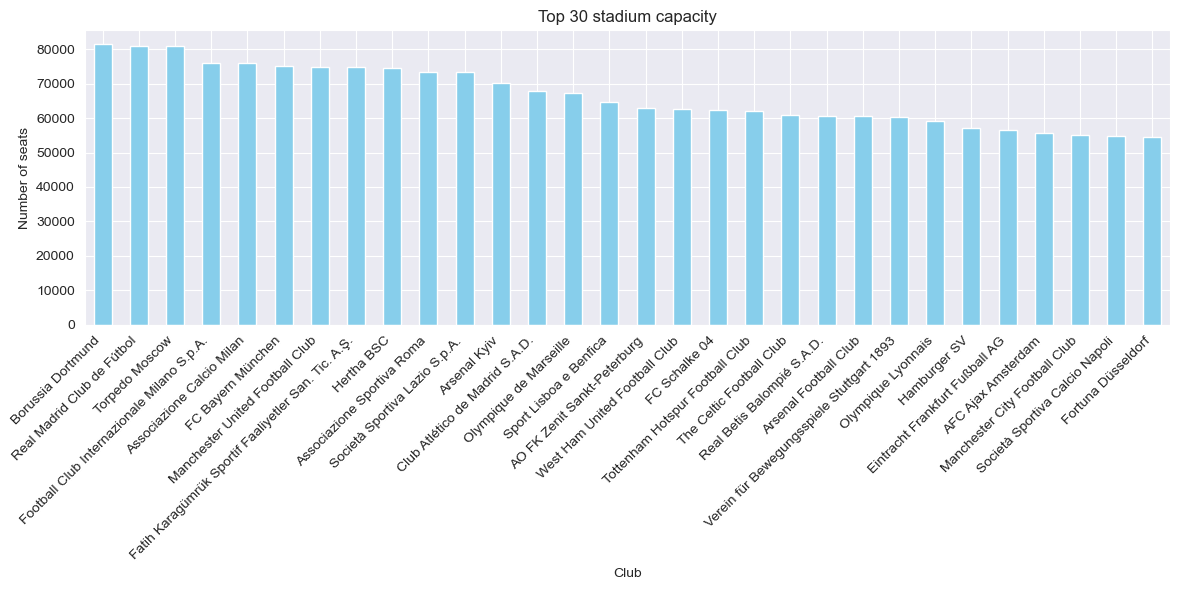

In [15]:

# Trova gli stadi più capienti per squadra
max_seats_per_team = clubs_df.groupby('name')['stadium_seats'].max()

# Ordina le squadre per stadio più capiente
max_seats_per_team = max_seats_per_team.sort_values(ascending=False)

# Prendi solo i primi 10 stadi più capienti
top_stadiums = max_seats_per_team.head(30)

# Crea il grafico
plt.figure(figsize=(12, 6))
top_stadiums.plot(kind='bar', color='skyblue')
plt.title('Top 30 stadium capacity')
plt.xlabel('Club')
plt.ylabel('Number of seats')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()